In [1]:
import nbsetup
import seaborn as sns
from references.milkyway import observations, solar
from models.load import load
from models.equations import velocity, null_gravity

In [2]:
sim = load('mcmillian2011best_300_40', masses=False)

Loaded mcmillian2011best_300_40


In [5]:
sim.dataframe()['rd'].unique()

array([ 0.        ,  0.26666667,  0.53333333,  0.8       ,  1.06666667,
        1.33333333,  1.6       ,  1.86666667,  2.13333333,  2.4       ,
        2.66666667,  2.93333333,  3.2       ,  3.46666667,  3.73333333,
        4.26666667,  5.33333333,  6.4       ,  7.46666667,  8.53333333,
        9.6       , 10.66666667, 11.73333333, 12.8       , 13.86666667,
       14.93333333, 16.        , 17.06666667, 18.13333333, 19.2       ,
       20.26666667,  4.        ,  8.        , 12.        , 20.        ,
       24.        , 28.        , 32.        , 36.        ,  8.8       ])

In [3]:
gamma, alpha = 43, 0.33

[(0.0, 25.0)]

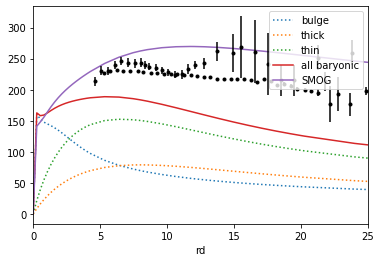

In [6]:
# components
for label, cdf in sim.dataframe().groupby('component'):
    R, F = cdf['rd'], cdf['x_vec']
    sns.lineplot(x=R, y=velocity(R, F), label=label, linestyle='dotted')

# combined
df = sim.dataframe(combined=True)
R, F, S = df['rd'], df['x_vec'], df['F_scalar']
sns.lineplot(x=R, y=velocity(R, F), label='all baryonic')

# scalar adjusted
N = null_gravity(F, S, gamma, alpha)
g = sns.lineplot(x=R, y=velocity(R, N), label='SMOG')

# observations
for label, obs in observations.items():
    x, y, e = obs['radius'], obs['velocity'], obs['sigma']
    g.errorbar(x, y, yerr=e, fmt='.k')

g.set(xlim=(0,25))

In [7]:
import numpy as np

In [13]:
gr = solar['gillessen2009'][0]

In [17]:
obs_g = np.interp(gr, obs['radius'], obs['velocity'])**2/gr
obs_g

6914.842737308256

In [18]:
bar_g = np.interp(gr, df['rd'], F)
bar_g

3994.788568967556

In [21]:
smog_g = np.interp(gr, df['rd'], N)
smog_g

8352.022730624685

In [20]:
obs_g/bar_g, smog_g/bar_g

(1.7309658866615265, 2.090729605943387)